In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '..')

%matplotlib inline
sns.set()

In [2]:
import glob

In [3]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-47-44/train/results.csv')
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-00/train/results.csv')
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-20/train/results.csv')
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-40/train/results.csv')

In [4]:
def smooth(x,w=0.5):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

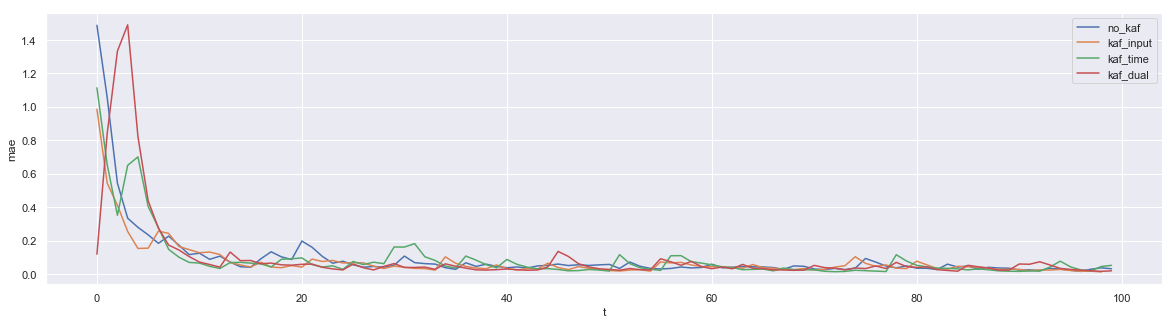

In [5]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_input','kaf_time', 'kaf_dual'])

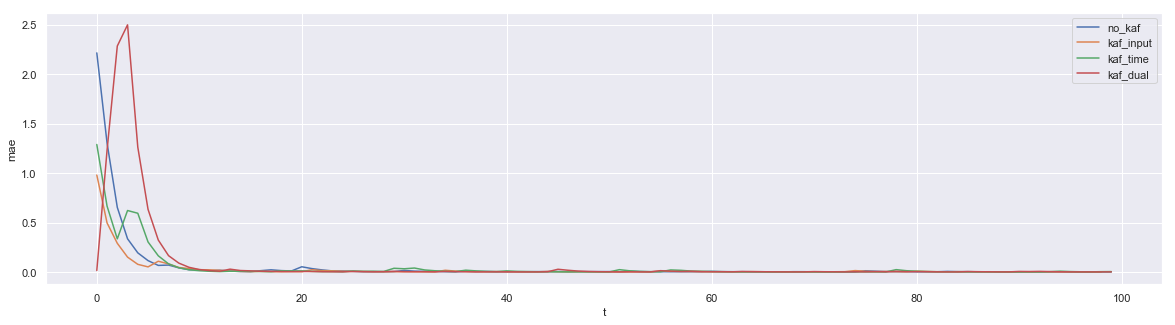

In [6]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.mse.values))
ax.plot(smooth(df_kaf_time.mse.values))
ax.plot(smooth(df_kaf_input.mse.values))
ax.plot(smooth(df_kaf_dual.mse.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_input','kaf_time', 'kaf_dual'])

In [7]:

rows = ['no_kaf','kaf_input','kaf_time', 'kaf_dual']

In [8]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [9]:
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.078957,8.064336,0.033064,0.078957,0.125331,0.078957,65.937515
kaf_input,0.079383,8.035255,0.033960,0.079383,0.104663,0.079383,32.559743
kaf_time,0.064236,6.816854,0.017319,0.064236,0.107159,0.064236,90.419360
kaf_dual,0.095523,6.903344,0.089160,0.095523,0.106509,0.095523,104.424889


In [11]:
header = table.index.tolist()

In [12]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-47-44/test/results.csv', names=header)
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-00/test/results.csv', names=header)
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-20/test/results.csv', names=header)
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-40/test/results.csv', names=header)

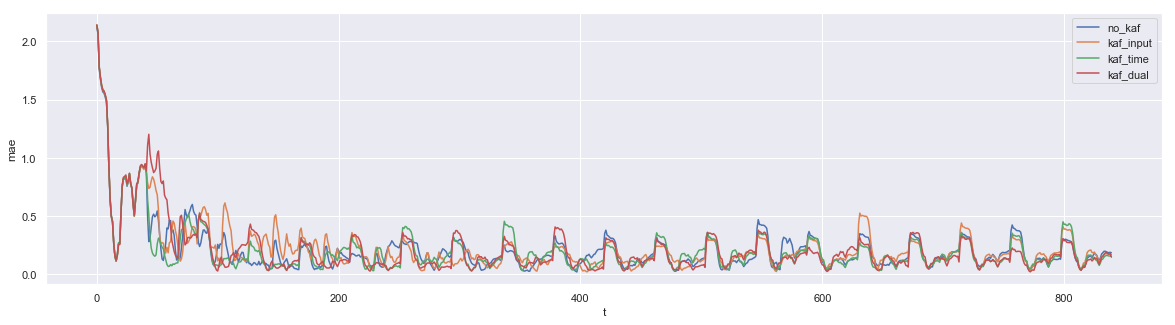

In [13]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_input','kaf_time', 'kaf_dual'])

In [14]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [15]:
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.210245,9.353506,0.094880,0.210245,0.285631,0.210245,77.038166
kaf_input,0.201119,11.174185,0.090615,0.201119,0.261420,0.201119,45.441643
kaf_time,0.225847,8.415277,0.105452,0.225847,0.309726,0.225847,81.253857
kaf_dual,0.210961,8.683827,0.105234,0.210961,0.279114,0.210961,60.301030


In [18]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-47-44/report/94320_report.csv', index_col=0)
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-00/report/94362_report.csv', index_col=0)
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-20/report/94320_report.csv', index_col=0)
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-15-12-48-40/report/94367_report.csv', index_col=0)

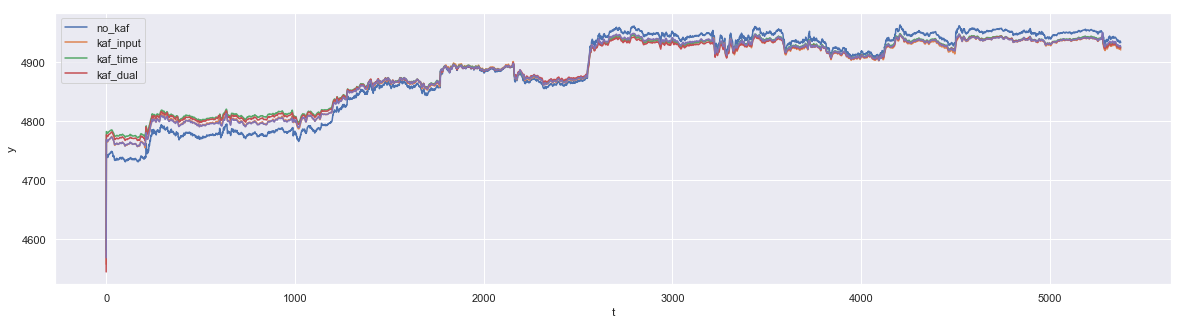

In [19]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df_no_kaf.y.values)
ax.plot(df_no_kaf.y_hat.values)
ax.plot(df_kaf_input.y_hat.values)
ax.plot(df_kaf_time.y_hat.values)
ax.plot(df_kaf_dual.y_hat.values)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_input','kaf_time', 'kaf_dual'])

In [20]:
df = pd.concat([df_no_kaf.y, df_no_kaf.y_hat, df_kaf_input.y_hat, df_kaf_time.y_hat, df_kaf_dual.y_hat], axis=1)

In [21]:
df.columns = ['y', 'y_hat', 'input', 'time', 'dual']

In [22]:
df.head()

,y,y_hat,input,time,dual
dates,,,,,
2016-11-25 03:00:00,4744.200,4558.1670,4582.3410,4545.1455,4569.1216
2016-11-25 03:05:00,4742.366,4767.9854,4782.2153,4776.6836,4768.7940
2016-11-25 03:10:00,4740.744,4767.3228,4781.7334,4776.1390,4768.3470
2016-11-25 03:15:00,4741.096,4766.9750,4781.5146,4775.8420,4767.9760
2016-11-25 03:20:00,4741.638,4766.6460,4781.3370,4775.7250,4767.9424


In [23]:
np.abs((df.y - df.y_hat)).mean()

12.159278497023802

In [24]:
np.abs((df.y - df.input)).mean()

13.690349869791657

In [25]:
np.abs((df.y - df.time)).mean()

14.034731398809521

In [26]:
np.abs((df.y - df.dual)).mean()

11.094714211309523